In [1]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from pandas_datareader import data as pdr
from bs4 import BeautifulSoup
from urllib.request import urlopen


In [19]:
!pip install pandas_datareader



# Задание 1.

Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Волшебный белый порошок" (ВБП), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на ВБП. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.

### Дополнительные вводные:

Так как продукт Б новый, возможно стоит предложить дисконт от цены Продукта А. Продукт производиться из нефти. Один из известных способов производства предполагает что из 16 баррелей нефти сделают одну тонну ВБП, а затраты на производство в районе 400 евро.

In [3]:
# Из данных есть:
# Цены на продукт А, который уже есть на рынке Европы
# ----- октябрь 2018 - 
# ----- ноябрь 2018 - 
# ----- февраль 2019 -

# Котировки нефти, курс eur/usd
dbc = pd.read_excel('cur_oil.xlsx')

# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%
dbc

,Date,EURUSD=X,OIL
0,2018-01-01,1.2005,NaN
1,2018-01-02,1.2012,59.15
2,2018-01-03,1.2063,59.15
3,2018-01-04,1.2010,59.15
4,2018-01-05,1.2069,60.44
...,...,...,...
341,2019-04-23,1.1259,67.72
342,2019-04-24,1.1224,67.14
343,2019-04-25,1.1153,66.37
344,2019-04-26,1.1137,64.27


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 

### В результате должно быть 3 файла:
1. Ноутбук с расчетами и графиками. 
2. Скрипт, который делает расчет цены для каждого клиента в одном файле
2. Скрипт, который делает расчет цены для каждого клиента в отельном файле

In [4]:
# FCA — Free Carrier — «Франко перевозчик». Обязанности продавца: 
# уплатить таможенные пошлины на вывоз, отгрузить товар перевозчику, 
# которого указал покупатель, и зафиксировать передачу в транспортных документах.
#Цена FCA (FCA price) означает, что контрактная (инвойсовая или таможенная) 
#цена за товар включает в себя сумму стоимости самого товара и экспортного таможенного 
#оформления этого товара с оплатой экспортных пошлин и иных сборов, без стоимости доставки (фрахта) до покупателя.

In [30]:
PRODUCTION_COST = 400 # (EUR) затраты на производство

# Расходы на логистику в зависимости от локации клиента
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# формулы для расчета
fca=16*price/EUR_USD+PRODUCTION_COST   # цена на исторических данных? базовая формула цены на условиях FCA (цена на заводе
ddp=16*price/EUR_USD+PRODUCTION_COST +cost #расчет возможной цены для каждого из клиентов на условиях DDP (цена с доставкой)

Monty
Triangle
Stone
Poly


,Date,EURUSD=X,OIL,FCA,DDP
0,2018-01-01,1.2005,NaN,NaN,NaN
1,2018-01-02,1.2012,59.15,1187.878788,1217.878788
2,2018-01-03,1.2063,59.15,1184.547791,1214.547791
3,2018-01-04,1.2010,59.15,1188.009992,1218.009992
4,2018-01-05,1.2069,60.44,1201.259425,1231.259425


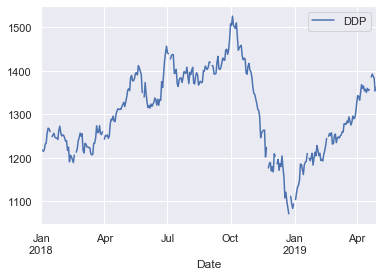

In [4]:
# расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой).
# Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
# Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
# Создать директорию «для клиентов» и в ней сложить файлы с расчетами.


dbc = pd.read_excel('cur_oil.xlsx')
#dbc.dropna(inplace=True)
EUR_USD=dbc['EURUSD=X'] # валюта из файла
price=dbc['OIL']  # цена из файла

# Запись все в один эксель файл
writ=pd.ExcelWriter('mame_prices.xlsx', engine='xlsxwriter')
for name, value in customers.items():
    print(name)    
    region=value['location']
    if region =='EU':
        cost=EU_LOGISTIC_COST_EUR
    if region =='CN':
        cost=CN_LOGISTIC_COST_USD/EUR_USD
        
    dbc['FCA']=16*price/EUR_USD+PRODUCTION_COST
    dbc['DDP']=dbc['FCA'] +cost
    
# запись на разных листах. Каждый лист - название клиента.
    dbc.to_excel(writ, sheet_name=name)

writ.save()

dbc

#
dbc.plot(x='Date', y='DDP')
dbc.head(5)


# Задание 2. Продолжение

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

В результате должно быть 3 файла
1. Ноутбук с расчетами и графиками (чтобы данные подтягивались туда)
2. Скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':


,Date,EURUSD=X,OIL,FCA,DDP,sum_DDP,sum_FCA,name
1,2018-01-02,1.20298,60.202,1200.704916,1230.704916,<bound method Series.mean of 1 1230.70491...,<bound method Series.mean of 1 1200.70491...,Poly
2,2018-01-03,1.20030,60.868,1211.370491,1241.370491,<bound method Series.mean of 1 1230.70491...,<bound method Series.mean of 1 1200.70491...,Poly
3,2018-01-04,1.19922,61.538,1221.040343,1251.040343,<bound method Series.mean of 1 1230.70491...,<bound method Series.mean of 1 1200.70491...,Poly
4,2018-01-05,1.19868,61.942,1226.802816,1256.802816,<bound method Series.mean of 1 1230.70491...,<bound method Series.mean of 1 1200.70491...,Poly
5,2018-01-08,1.20330,62.404,1229.771462,1259.771462,<bound method Series.mean of 1 1230.70491...,<bound method Series.mean of 1 1200.70491...,Poly


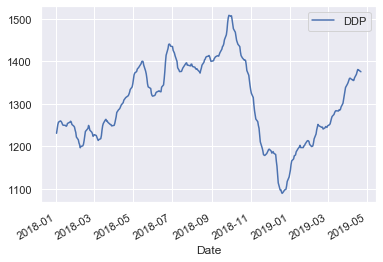

In [5]:
# открываю файл с курсом валют
dbc = pd.read_excel('cur_oil.xlsx')
dbc.dropna(inplace=True)
# копии с баз
dba=dbc.copy()
dbt=dbc.copy()


dba['EURUSD=X']=dba['EURUSD=X'].rolling(window=5, min_periods=1).mean().shift(-5)
dba['OIL']=dba['OIL'].rolling(window=5, min_periods=1).mean().shift(-5)

dbt= (dbt.groupby(pd.Grouper(key='Date', freq='M'))['EURUSD=X','OIL'].mean().reset_index())

dba.dropna(inplace=True)
dbt.dropna(inplace=True)
    



for name, value in customers.items():
    region=value['location']
    comment=value['comment']
    writ=pd.ExcelWriter((f'{name}.xlsx'),engine='xlsxwriter') 
    #/Users/user/Desktop/учеба/piton/home3/hometask/
    if region =='EU':
        cost=EU_LOGISTIC_COST_EUR
    if region =='CN':
        cost=CN_LOGISTIC_COST_USD/EUR_USD
      
    if comment=='monthly':   #ежемесячно
        dba['FCA']=16*dba['OIL']/dba['EURUSD=X']+PRODUCTION_COST
        dba['DDP']=dba['FCA'] +cost 
        sum_DDP=dba['DDP'].mean
        dba['sum_DDP']=sum_DDP
        dba['sum_FCA']=dba['FCA'].mean
    
        dba['name']=name
        dba.to_excel(writ, sheet_name=name)
        
    if comment=='moving_average':  #скользящая средняя
        dbt['FCA']=16*dbt['OIL']/dbt['EURUSD=X']+PRODUCTION_COST
        dbt['DDP']=dbt['FCA'] +cost 
        dbt['sum_DDP']=float(sum(dbt['DDP']))
        dbt['sum_FCA']=sum(dbt['FCA'])
        dbt['name']=name
        dbt.to_excel(writ, sheet_name=name)
        
    writ.save()    


dba.plot(x='Date', y='DDP')
dba.head(5)

# Задание 3. Back to Russia

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать ВБП для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать ВБП с завода самостоятельно.
1. На основе тех данных, которые уже есть предложите цену новому клиенту. 
2. Подготовьте скрипт, который будет использовать курс публикуемый на <a href='http://www.cbr.ru/currency_base/dynamics/'> сайте ЦБ РФ</a>.


In [9]:
from fpdf import FPDF
import requests

In [29]:
# Резутат записывает в pdf файл
print('Введите количества товара: ')
kol = int(input())
print('Введите имя клиента: ')
name = str(input())


import requests # Модуль для обработки URL
from bs4 import BeautifulSoup # Модуль для работы с HTML
import time # Модуль для остановки программы
import smtplib # Модуль для работы с почтой


dbt=dbc.copy()
price_FCA=0
# Основной класс
class Currency:
    # Ссылка на нужную страницу
    DOLLAR_RUB = 'https://www.google.com/search?sxsrf=ALeKk01NWm6viYijAo3HXYOEQUyDEDtFEw%3A1584716087546&source=hp&ei=N9l0XtDXHs716QTcuaXoAg&q=%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80+%D0%BA+%D1%80%D1%83%D0%B1%D0%BB%D1%8E&oq=%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80+&gs_l=psy-ab.3.0.35i39i70i258j0i131l4j0j0i131l4.3044.4178..5294...1.0..0.83.544.7......0....1..gws-wiz.......35i39.5QL6Ev1Kfk4'
    # Заголовки для передачи вместе с URL
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'}

    current_converted_price = 0
  
    def __init__(self):
        # Установка курса валюты при создании объекта
        self.current_converted_price = float(self.get_currency_price().replace(",", "."))

    # Метод для получения курса валюты
    def get_currency_price(self):
        # Парсим всю страницу
        full_page = requests.get(self.DOLLAR_RUB, headers=self.headers)

        # Разбираем через BeautifulSoup
        soup = BeautifulSoup(full_page.content, 'html.parser')

        # Получаем нужное для нас значение и возвращаем его
        convert = soup.findAll("span", {"class": "DFlfde", "class": "SwHCTb", "data-precision": 2})
        return convert[0].text

    # Проверка изменения валюты
    def check_currency(self):
            currency = float(self.get_currency_price().replace(",", "."))
            price_FCA=16*currency/(currency*1.2)+PRODUCTION_COST
            
            writ = pd.ExcelWriter(f'demo.xlsx', engine='xlsxwriter')
            
            if kol<=100:
                price_FCA=price_FCA-price_FCA*0.01
            if kol>100 and kol<300:
                price_FCA=price_FCA-price_FCA*0.05
            if kol>=300:
                price_FCA=price_FCA-price_FCA*0.1
                       
                
            dbt['USD']=currency
            dbt['price']=price_FCA
            dbt.to_excel(writ, sheet_name=name)
            writer.save()
            return print('курс: 1 доллар =', currency, 'Цена для покупателя',price_FCA)

    #    print("Сейчас курс: 1 доллар = " + str(currency))
    


# Создание объекта и вызов метода
currency = Currency()
currency.check_currency()



Введите количества товара: 
500
Введите имя клиента: 
iii
курс: 1 доллар = 74.1 Цена для покупателя 372.0


# Задание 4. Check it

* Подумайте, как можно проверить корректность работы алгоритма? 
* Какие возможны ошибки?
* Придумайте тесты для проверки возможных ошибок алгоритма
* Интергрируйте их в свои скрипты в виде исключений


In [30]:
def cost(price, currency):
    cost = (16 * price/currency) + PRODUCTION_COST
    return cost

In [31]:
# только при равных значениях price=currency
assert cost(50,50)== 416.0

# Задание 5. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ, но помните о PEP8

In [59]:
# import yourpackage
# import yourpackage



ModuleNotFoundError: No module named 'mwp'

# Задание 6. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

* Создайте отдельный пакет, который можно устанавливать с помощью pip 
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в репозиторий

In [ ]:
# !pip install yourpackage
# import yourpackage

In [18]:
import requests # Модуль для обработки URL
from bs4 import BeautifulSoup # Модуль для работы с HTML
import time # Модуль для остановки программы
import smtplib # Модуль для работы с почтой


dbt=dbc.copy()
# Основной класс
class Currency:
    # Ссылка на нужную страницу
    DOLLAR_RUB = 'https://www.google.com/search?sxsrf=ALeKk01NWm6viYijAo3HXYOEQUyDEDtFEw%3A1584716087546&source=hp&ei=N9l0XtDXHs716QTcuaXoAg&q=%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80+%D0%BA+%D1%80%D1%83%D0%B1%D0%BB%D1%8E&oq=%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80+&gs_l=psy-ab.3.0.35i39i70i258j0i131l4j0j0i131l4.3044.4178..5294...1.0..0.83.544.7......0....1..gws-wiz.......35i39.5QL6Ev1Kfk4'
    # Заголовки для передачи вместе с URL
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'}

    current_converted_price = 0
    difference = 5 # Разница после которой будет отправлено сообщение на почту

    def __init__(self):
        # Установка курса валюты при создании объекта
        self.current_converted_price = float(self.get_currency_price().replace(",", "."))

    # Метод для получения курса валюты
    def get_currency_price(self):
        # Парсим всю страницу
        full_page = requests.get(self.DOLLAR_RUB, headers=self.headers)

        # Разбираем через BeautifulSoup
        soup = BeautifulSoup(full_page.content, 'html.parser')

        # Получаем нужное для нас значение и возвращаем его
        convert = soup.findAll("span", {"class": "DFlfde", "class": "SwHCTb", "data-precision": 2})
        return convert[0].text

    # Проверка изменения валюты
    def check_currency(self):
            currency = float(self.get_currency_price().replace(",", "."))
            price_FCA=16*currency/(currency*1.2)+PRODUCTION_COST
            
            writer = pd.ExcelWriter(f'demo.xlsx', engine='xlsxwriter')
            dbt['USD']=currency
            dbt['price']=price_FCA
            dbt.to_excel(writ, sheet_name=name)
            writer.save()
            return print('курс: 1 доллар =', currency, 'Цена для покупателя',price_FCA)

    #    print("Сейчас курс: 1 доллар = " + str(currency))
    


# Создание объекта и вызов метода
currency = Currency()
currency.check_currency()





курс: 1 доллар = 74.1 Цена для покупателя 413.3333333333333
